In [1]:
import pandas as pd

In [23]:
import requests

In [66]:
import geopandas as gpd

In [68]:
from shapely.geometry import Point

In [7]:
%matplotlib inline

In [3]:
df = pd.read_csv('tabula-Documents_for_P062407_part_2.csv')

In [5]:
df.head()

,Arrest Date,Street No,Street Direction,Street name,Arrest ID,Statute,Statute Description,Age,Race
0,3-Sep-12,9XX,W,WILSON AVE,16416248,720 ILCS 550.0/4-A,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER
1,19-Jun-16,56XX,S,ABERDEEN ST,17265153,9-52-020,RIDING BICYCLE ON SIDEWALK,18,BLACK
2,4-Nov-12,55XX,S,PRINCETON AVE,16461059,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,36,BLACK
3,7-Mar-13,4XX,S,SACRAMENTO BLVD,16540607,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,20,BLACK
4,4-Mar-13,13XX,S,INDEPENDENCE BLVD,16538898,625 ILCS 5.0/6-303-D,FELONY DRIVING WHILE LICENSE SUSPENDED OR REVO...,38,BLACK


In [105]:
df.race.value_counts()

BLACK                      305
HISPANIC                    62
WHITE                       16
ASIAN/PACIFIC ISLANDER       3
AMER IND/ALASKAN NATIVE      1
Name: race, dtype: int64

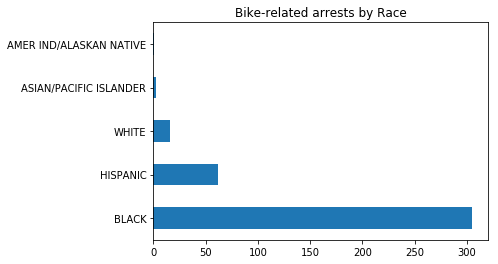

In [9]:
df.Race.value_counts().plot(kind='barh', title="Bike-related arrests by Race")

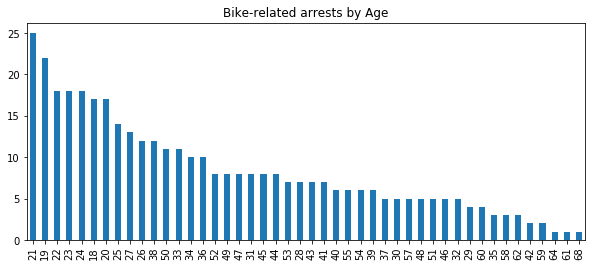

In [12]:
df.Age.value_counts().plot(kind='bar', title="Bike-related arrests by Age", figsize=(10,4))

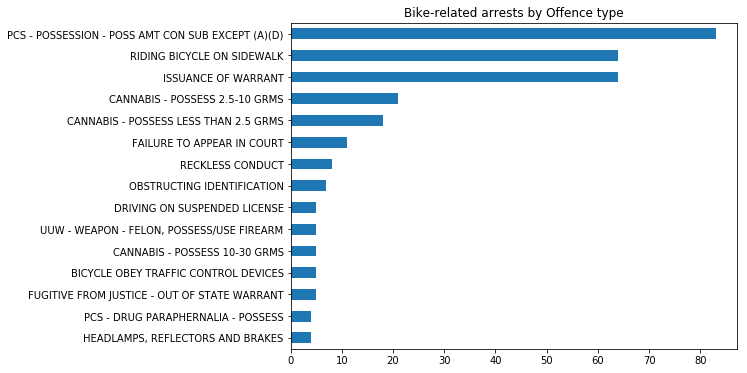

In [20]:
df['Statute Description'].value_counts().sort_values().tail(15).plot(kind='barh', title="Bike-related arrests by Offence type", figsize=(8,6))

In [21]:
df['Street No'] = df['Street No'].str.replace("X", "0")

In [28]:
base_url = 'http://maps.google.com/maps/api/geocode/json?address='

In [46]:
df['lat'] = ''
df['lng'] = ''

In [55]:
def get_coordinates(row):
    url = base_url + row['Street No'] + ' ' + row['Street name'] + ', Chicago, IL'
    response = requests.get(url)
    json = response.json()
    print ('lat:', json['results'][0]['geometry']['location']['lat'])
    print ('lon:',  json['results'][0]['geometry']['location']['lng'])
    row['lat'] = json['results'][0]['geometry']['location']['lat']
    row['lng'] = json['results'][0]['geometry']['location']['lng']

In [56]:
df[df.index == 0].apply(get_coordinates, axis=1)

lat: 41.9660193
lon: -87.6521886


0    None
dtype: object

In [64]:
for i in df.index:
    url = base_url + df.loc[i, 'Street No'] + ' ' + df.loc[i, 'Street name'] + ', Chicago, IL'
    response = requests.get(url)
    json = response.json()
    df.loc[i, 'lat'] = json['results'][0]['geometry']['location']['lat']
    df.loc[i, 'lng'] = json['results'][0]['geometry']['location']['lng']

In [78]:
df

,date,Street No,Street Direction,Street name,Arrest ID,Statute,statute,age,race,lat,lng,geometry
0,3-Sep-12,900,W,WILSON AVE,16416248,720 ILCS 550.0/4-A,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER,41.966,-87.6522,POINT (-87.6521886 41.9660193)
1,19-Jun-16,5600,S,ABERDEEN ST,17265153,9-52-020,RIDING BICYCLE ON SIDEWALK,18,BLACK,41.7922,-87.6527,POINT (-87.652731 41.7922383)
2,4-Nov-12,5500,S,PRINCETON AVE,16461059,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,36,BLACK,41.7945,-87.633,POINT (-87.6329982 41.7945059)
3,7-Mar-13,400,S,SACRAMENTO BLVD,16540607,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,20,BLACK,41.888,-87.7014,POINT (-87.70141939999999 41.8879762)
4,4-Mar-13,1300,S,INDEPENDENCE BLVD,16538898,625 ILCS 5.0/6-303-D,FELONY DRIVING WHILE LICENSE SUSPENDED OR REVO...,38,BLACK,41.8642,-87.7205,POINT (-87.720524 41.864238)
5,16-May-14,5000,W,CONGRESS PKWY,16827404,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),64,BLACK,41.8743,-87.7495,POINT (-87.74946059999999 41.8742938)
6,28-Feb-14,6700,S,MARSHFIELD AVE,16777433,1-4-145-A,FAILURE TO APPEAR IN COURT,25,BLACK,41.7722,-87.6653,POINT (-87.66527169999999 41.7721612)
7,13-Mar-13,1600,W,HOWARD ST,16545017,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,41,BLACK,42.0195,-87.687,POINT (-87.68697589999999 42.019502)
8,12-Jul-13,300,E,47TH ST,16631631,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,47,BLACK,41.8095,-87.6193,POINT (-87.6193177 41.8095108)
9,30-Sep-14,7000,S,PERRY AVE,16918050,625 ILCS 5.0/11-501-A-2,IVC - DRIVING UNDER INFLUENCE OF ALCOHOL,26,BLACK,41.7673,-87.6282,POINT (-87.62821049999999 41.7672642)


In [67]:
df.to_csv('bikearrests.csv')

In [69]:
df['geometry'] = df.apply(lambda row: Point(row['lng'], row['lat']), axis=1)

In [76]:
colnames = {
    'Arrest Date': 'date',
    'Statute Description': 'statute',
    'Age': 'age',
    'Race': 'race'
}

In [77]:
df.rename(columns=colnames, inplace=True)

In [90]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [91]:
gdf.crs = {'init': 'epsg:4326'}

In [92]:
gdf

,date,Street Direction,Street name,Arrest ID,Statute,statute,age,race,lat,lng,geometry
0,3-Sep-12,W,WILSON AVE,16416248,720 ILCS 550.0/4-A,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER,41.966,-87.6522,POINT (-87.6521886 41.9660193)
1,19-Jun-16,S,ABERDEEN ST,17265153,9-52-020,RIDING BICYCLE ON SIDEWALK,18,BLACK,41.7922,-87.6527,POINT (-87.652731 41.7922383)
2,4-Nov-12,S,PRINCETON AVE,16461059,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,36,BLACK,41.7945,-87.633,POINT (-87.6329982 41.7945059)
3,7-Mar-13,S,SACRAMENTO BLVD,16540607,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,20,BLACK,41.888,-87.7014,POINT (-87.70141939999999 41.8879762)
4,4-Mar-13,S,INDEPENDENCE BLVD,16538898,625 ILCS 5.0/6-303-D,FELONY DRIVING WHILE LICENSE SUSPENDED OR REVO...,38,BLACK,41.8642,-87.7205,POINT (-87.720524 41.864238)
5,16-May-14,W,CONGRESS PKWY,16827404,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),64,BLACK,41.8743,-87.7495,POINT (-87.74946059999999 41.8742938)
6,28-Feb-14,S,MARSHFIELD AVE,16777433,1-4-145-A,FAILURE TO APPEAR IN COURT,25,BLACK,41.7722,-87.6653,POINT (-87.66527169999999 41.7721612)
7,13-Mar-13,W,HOWARD ST,16545017,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,41,BLACK,42.0195,-87.687,POINT (-87.68697589999999 42.019502)
8,12-Jul-13,E,47TH ST,16631631,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,47,BLACK,41.8095,-87.6193,POINT (-87.6193177 41.8095108)
9,30-Sep-14,S,PERRY AVE,16918050,625 ILCS 5.0/11-501-A-2,IVC - DRIVING UNDER INFLUENCE OF ALCOHOL,26,BLACK,41.7673,-87.6282,POINT (-87.62821049999999 41.7672642)


In [ ]:
gdf.pop('Street No')

In [95]:
gdf.pop('Street Direction')
gdf.pop('Statute')
gdf.pop('lat')
gdf.pop('lng')

0     -87.6522
1     -87.6527
2      -87.633
3     -87.7014
4     -87.7205
5     -87.7495
6     -87.6653
7      -87.687
8     -87.6193
9     -87.6282
10    -87.5518
11    -87.6311
12    -87.5943
13    -87.6922
14    -87.6079
15    -87.5616
16    -87.6283
17    -87.6215
18    -87.6051
19    -87.6562
20    -87.6289
21    -87.6575
22    -87.7427
23     -87.696
24    -87.6642
25    -87.7465
26    -87.7456
27    -87.7042
28    -87.7379
29    -87.7206
        ...   
357   -87.6383
358   -87.5953
359   -87.6527
360   -87.5702
361   -87.6339
362   -87.6714
363   -87.7338
364   -87.7645
365   -87.6569
366   -87.5964
367   -87.7407
368   -87.7539
369   -87.6864
370   -87.6468
371   -87.6864
372   -87.5763
373   -87.6337
374   -87.7453
375   -87.6875
376   -87.7184
377   -87.6514
378   -87.7392
379    -87.619
380   -87.7316
381   -87.7733
382   -87.7466
383   -87.7509
384   -87.7317
385   -87.6493
386   -87.6926
Name: lng, Length: 387, dtype: object

In [102]:
gdf.head(1)

,date,Street name,Arrest ID,statute,age,race,geometry
0,3-Sep-12,WILSON AVE,16416248,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER,POINT (-87.6521886 41.9660193)


In [97]:
geojson = gdf.to_json()

In [99]:
type(geojson)

str

In [101]:
with open('arrests.js', 'w') as f:
    f.write('var pointsData = ' + geojson)    